In [42]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cmocean import cm
import colorcet as cc
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

%matplotlib inline

In [52]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [3]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [5]:
data = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/Lagrangian_diesel-4_northern_strait_first30-4.nc')

In [53]:
oil = data.OilWaterColumnOilVol_3D[:, 39] > 0.001

In [54]:
oil.shape

(168, 896, 396)

In [55]:
imin = 500
jmin = 100
imax = 770
jmax = 340

In [57]:
default = 240
oil_arrival = default * np.ones((896, 396))
for ii in range(imin, imax):
    if (int(ii/10)*10 == ii):
        print (ii)
    for jj in range(jmin, jmax):
        oil_arrival[ii, jj] = next((it for it, x in enumerate(oil[:, ii, jj]) if x), default)

        

500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760


In [58]:
print (oil_arrival.max()/24)

10.0


In [66]:
arrived = np.ma.masked_array(oil_arrival/24., oil_arrival/24. >= 10)


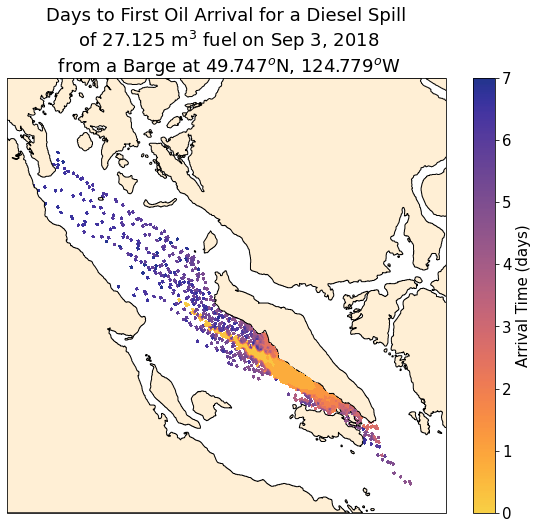

In [71]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)

C = ax.contourf(
    mesh.nav_lon[1:-1, 1:-1], mesh.nav_lat[1:-1, 1:-1], arrived, np.arange(0, 7, 0.5),
    extend='both', transform=crs.PlateCarree(), zorder=2, cmap=thermal_r_t
)
C = ax.pcolormesh(
    mesh.nav_lon[1:, 1:], mesh.nav_lat[1:, 1:], arrived, vmin=0, vmax=7,
    transform=crs.PlateCarree(), cmap=thermal_r_t
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Arrival Time (days)')
ax.set_title("Days to First Oil Arrival for a Diesel Spill\n of 27.125 m$^3$ fuel on Sep 3, 2018\n from a Barge at 49.747$^o$N, 124.779$^o$W");
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
fig.savefig('SingleSpill_latlon.png')

In [38]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = colors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [70]:
minColor = 0.1
maxColor = 0.85
thermal_r_t = truncate_colormap(cm.thermal_r, minColor, maxColor)
#thermal_r_t.set_bad('k')